# ONC Mouring at the Mouth of the JDF
lat = 48.508133 <br>
lon = -124.749117<br>
depth = 226 m <br>
station name = OceanNetworksCanada-Pacific-SalishSea-JuandeFucaStrait-JFCNMooring

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ONC12 = pd.read_csv('SBECTD37SMPODO9532_20121016T235021Z_20130422T235042Z-NaN_clean.csv', header=50, skiprows=[i for i in range(51,230)])
ONC13 = pd.read_csv('SBECTD37SMPODO9533_20130423T193536Z_20131024T235042Z-NaN_clean.csv', header=50, skiprows=[51])
ONC14 = pd.read_csv('SBECTD37SMPODO9537_20131025T180034Z_20140512T234041Z-NaN_clean.csv', header=50, skiprows=[51,52])

In [3]:
ONC12['DateTime'] = pd.to_datetime(ONC12['#"Time UTC (yyyy-mm-ddThh:mm:ss.fffZ)"'])
ONC12.set_index('DateTime',inplace=True)
ONC12.drop('#"Time UTC (yyyy-mm-ddThh:mm:ss.fffZ)"',axis='columns', inplace=True)

ONC13['DateTime'] = pd.to_datetime(ONC13['#"Time UTC (yyyy-mm-ddThh:mm:ss.fffZ)"'])
ONC13.set_index('DateTime',inplace=True)
ONC13.drop('#"Time UTC (yyyy-mm-ddThh:mm:ss.fffZ)"',axis='columns', inplace=True)

ONC14['DateTime'] = pd.to_datetime(ONC14['#"Time UTC (yyyy-mm-ddThh:mm:ss.fffZ)"'])
ONC14.set_index('DateTime',inplace=True)
ONC14.drop('#"Time UTC (yyyy-mm-ddThh:mm:ss.fffZ)"',axis='columns', inplace=True)

In [4]:
df = pd.concat([ONC12, ONC13, ONC14])
df[' "Temperature (C)"'] = pd.to_numeric(df[' "Temperature (C)"'],errors='coerce')

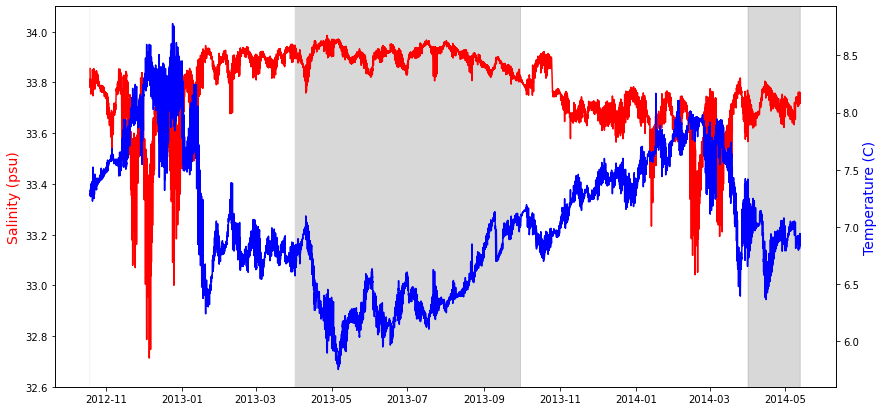

In [5]:
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(df[' "Practical Salinity (psu)"'], c='r')
ax.set_ylabel("Salinity (psu)",fontsize=14, c='r')
ax.set_ylim(32.6,34.1)

ax2 = ax2=ax.twinx()
ax2.plot(df[' "Temperature (C)"'], c='b')
ax2.set_ylabel("Temperature (C)",fontsize=14, c='b')

#set summer upwelling as apr1-sep30
season = pd.to_datetime(['2013-04-01 00:00:00.000000+00:00','2013-09-30 00:00:00.000000+00:00', '2014-04-01 00:00:00.000000+00:00'])
ax.fill_between(df.index, 30,35, where=df.index>season[2], color='grey', alpha=0.3)
ax.fill_between(df.index, 30,35, where= df.index<season[1], color='grey', alpha=0.3)
ax.fill_between(df.index, 30,35, where= df.index<season[0], color='white')

grey = summer upwelling (april 01 to september 30) <br>
white = winter downwelling (october 1 to march 31)